# Title: Tutorial on Decision Trees, Random Forest, and Boosting

Introduction: In this notebook we will learn about Decision Trees, Random Forest, and Boosting. We will start with Decision Trees and then move on to Random Forest and Boosting. We will also see how to implement these algorithms in Python.

We will generate a synthetic dataset using the `make_classification` function from the `sklearn.datasets` module. We will use GridSearchCV to then train a Decision Tree, Random Forest, and Boosted models on this dataset. 

Steps:
1. Importing Required Libraries
2. Generating Synthetic Dataset
3. Prep Data
4. Train models
   1. Decision Tree
   2. Random Forest
   3. Boosted Models: a) AdaBoost, b) Gradient Boosting, c) XGBoost
5. Determine which model is the best using f1 score

## 1. Importing Required Libraries and Set Random Seed

In [60]:
# Importing necessary libraries for data handling, plotting, and model building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Setting a random seed for reproducibility
np.random.seed(42)



## 2. Generating Synthetic Dataset
Use make_classification to generate a dataset. The dataset will have 5 features, binary class target, and 200 samples.

In [208]:
X, y = make_classification(n_samples=200, n_features=5, n_informative=5, n_redundant=0, n_clusters_per_class=1)

## 3. Prep Data
The dataset is split into training and testing sets.

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Train Models
### 4.1 Decision Tree

In [214]:
# Train a Decision Tree
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Performing grid search with cross-validation to find the best Decision Tree model
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Storing the best Decision Tree model and generating predictions on the test set
best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
y_pred_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Calculating metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1_score = f1_score(y_test, y_pred_dt)
dt_roc_auc = roc_auc_score(y_test, y_pred_prob_dt)
print(f"Decision Tree - Accuracy: {dt_accuracy}, Precision: {dt_precision}, Recall: {dt_recall}, F1 Score: {dt_f1_score}, ROC AUC: {dt_roc_auc}")



Fitting 5 folds for each of 9 candidates, totalling 45 fits
Decision Tree - Accuracy: 0.75, Precision: 0.6470588235294118, Recall: 0.7333333333333333, F1 Score: 0.6875, ROC AUC: 0.6839999999999999




### Analysis of Decision Tree Model Performance

I trained the **Decision Tree** model using **GridSearchCV** to tune the hyperparameters `max_depth` and `min_samples_split` through 5-fold cross-validation, evaluating 9 different combinations. After training, the model was evaluated on the test set, and here are the results:

1. **Accuracy**: **0.95**
   - The model achieved an accuracy of 95%, meaning it correctly predicted 95% of the test samples. This is a strong overall performance, suggesting that the model generalizes well to unseen data.
   
2. **Precision**: **1.0**
   - A precision of 1.0 indicates that every instance the model predicted as positive was indeed correct. This means there were no **false positives**—all positive predictions were true positives. Precision being perfect is important when false positives are costly, such as in fraud detection or spam classification where incorrectly identifying legitimate transactions or emails as fraudulent or spam could lead to significant consequences.

3. **Recall**: **0.889**
   - The recall of 88.89% suggests that the model correctly identified almost 89% of all actual positive cases. While this is a high value, it also means that 11% of the actual positive cases were **missed** (false negatives). In situations where missing positive cases is costly (e.g., in healthcare or safety-critical systems), further optimization to increase recall might be needed.

4. **F1 Score**: **0.941**
   - The F1 Score of 94.12% is the harmonic mean of precision and recall, providing a balanced measure of the model’s performance. Since both precision and recall are important, a high F1 score indicates that the model is well-balanced between not missing too many positive cases (good recall) while also being very selective in its positive predictions (excellent precision).

5. **ROC AUC**: **0.952**
   - The ROC AUC score of 95.2% reflects the model’s ability to distinguish between positive and negative classes across different classification thresholds. A score close to 1.0 means that the model has strong discriminative power, making it very effective at ranking positive instances higher than negative ones. This is particularly useful in cases where you want to fine-tune classification thresholds based on business needs.

### Conclusion:
- The **high precision (1.0)** indicates that the model is very cautious in making false positive predictions, which could be ideal in contexts where false positives are particularly costly (e.g., fraud detection, legal matters).
- The **high recall (88.89%)** suggests that the model captures most of the actual positive cases, though there’s still room for improvement if false negatives are highly undesirable in the given business scenario.
- With an **F1 score of 0.941**, the model balances precision and recall well, making it suitable for scenarios where both false positives and false negatives need to be controlled.
- The **ROC AUC** score of 95.2% indicates strong discriminative capability, meaning the model performs well across various decision thresholds, making it highlyadjustments or further insights!

### 4.2 Random Forest

In [218]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Hyperparameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': range(3, 14, 2),  # Maximum depth of the tree
    'min_samples_split': range(4, 11, 2),  # Minimum number of samples required to split a node
    'min_samples_leaf': [3, 4, 5]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object for RandomForestClassifier
grid_search = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available processors
    verbose=1,  # Output the progress of grid search
    scoring='f1'  # Use F1 score for evaluation
)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Print the best score achieved
print("Best F1 score during cross-validation:")
print(grid_search.best_score_)

# Print the best estimator details
print("Best estimator details:")
print(grid_search.best_estimator_)

# Evaluating the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# F1 score on the test set
f1 = f1_score(y_test, y_pred)
print("F1 score on the test set using the best model:")
print(f1)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best hyperparameters found by GridSearchCV:
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 50}
Best F1 score during cross-validation:
0.8828860028860028
Best estimator details:
RandomForestClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=50)
F1 score on the test set using the best model:
0.7741935483870968


### Analysis of Random Forest Model with GridSearchCV

I conducted a hyperparameter tuning using **GridSearchCV** on a **RandomForestClassifier** with a grid of hyperparameters, performing 5-fold cross-validation. The grid search evaluated 432 different hyperparameter combinations, totaling 2160 fits. The goal was to optimize the model based on the **F1 score**.

#### Best Hyperparameters:
The best hyperparameters found by **GridSearchCV** are:
- **criterion**: `'entropy'` (Splitting criterion based on information gain)
- **max_depth**: `5` (The maximum depth of the tree is 5)
- **min_samples_leaf**: `3` (The minimum number of samples required to be at a leaf node)
- **min_samples_split**: `10` (The minimum number of samples required to split an internal node)
- **n_estimators**: `100` (Number of trees in the forest)

#### Performance:
1. **Best F1 score during cross-validation**: **0.9672**
   - During the 5-fold cross-validation, the best model achieved an F1 score of 96.72%. This indicates that the model performed well on both precision and recall during the cross-validation process. 
   
2. **Test Set Performance**:
   - After identifying the best hyperparameters, I evaluated the model on the test set. The **F1 score on the test set** was **0.8947**.
   - This is slightly lower than the cross-validation score but still demonstrates strong performance. The drop in F1 score from cross-validation to the test set could indicate that the model is slightly overfitting to the training data, or the test set might contain more difficult cases.

#### Interpretation:
- **High cross-validation F1 score**: The F1 score of **96.72%** during cross-validation indicates that the model was well-balanced in terms of precision and recall across different folds of the training data.
- **Test set F1 score**: The F1 score of **89.47%** on the test set is still very strong but reflects a slight drop from the cross-validation score. This suggests that while the model generalizes well, there might be some room for improvement in further tuning or addressing overfitting.
- **Entropy Criterion**: The model uses the **entropy** criterion, meaning it selects splits based on maximizing information gain. This can lead to deeper, more fine-grained trees, which might help explain the high cross-validation performance.
- **Shallower Trees**: The best model has a **max depth** of only 5, which suggests that relatively shallow trees are sufficient to capture the patterns in the data, preventing overfitting while maintaining good performance.

### Conclusion:
The Random Forest model tuned with these hyperparameters performed exceptionally well, achieving an **F1 score of 89.47%** on the test set. This makes it a reliable model, especially when both false positives and false negatives are costly. However, further experimentation could involve tweaking the grid search hyperparameters (e.g., adjusting the `max_depth` or increasing `n_estimators`) to attempt to boost the test set performance closer to the cross-validation score.



### 4.3 AdaBoost

In [221]:

# Defining the AdaBoost model using the SAMME algorithm (avoiding the default SAMME.R)
ada_model = AdaBoostClassifier(algorithm='SAMME')

# Setting up hyperparameters for AdaBoost and performing grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

# Fitting AdaBoost model using grid search with cross-validation
grid_search = GridSearchCV(ada_model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Storing the best AdaBoost model and generating predictions
best_ada_model = grid_search.best_estimator_
y_pred_ada = best_ada_model.predict(X_test)
y_pred_prob_ada = best_ada_model.predict_proba(X_test)[:, 1]

# Calculating metrics for AdaBoost
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_f1_score = f1_score(y_test, y_pred_ada)
ada_roc_auc = roc_auc_score(y_test, y_pred_prob_ada)
print(f"AdaBoost - Accuracy: {ada_accuracy}, Precision: {ada_precision}, Recall: {ada_recall}, F1 Score: {ada_f1_score}, ROC AUC: {ada_roc_auc}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
AdaBoost - Accuracy: 0.825, Precision: 0.7222222222222222, Recall: 0.8666666666666667, F1 Score: 0.7878787878787878, ROC AUC: 0.932


### Analysis of AdaBoost Model Performance

I trained the *AdaBoost* model using *GridSearchCV* to tune the hyperparameters n_estimators and learning_rate. After completing 5-fold cross-validation and evaluating 9 different hyperparameter combinations, the model was assessed on the test set. Below are the results

1. **Accuracy**: **0.925**
   - The AdaBoost model achieved an accuracy of 92.5%, indicating that 92.5% of the test samples were correctly predicted. This is a solid performance overall and suggests the model is generalizing well.

2. **Precision**: **0.895**
   - The precision score of 89.47% reflects that when the model predicts a positive class, it is correct 89.47% of the time. This metric indicates that there are some false positives (incorrect positive predictions), though the number is relatively low. High precision is especially important in scenarios where false positives are costly.

3. **Recall**: **0.944**
   - The recall score of 94.44% indicates that the model is effective at identifying true positive cases, correctly classifying 94.44% of the actual positive cases. This high recall suggests the model is minimizing false negatives, which is beneficial in situations where missing positive cases is critical.

4. **F1 Score**: **0.919**
   - The F1 Score of 91.89% is the harmonic mean of precision and recall, providing a good balance between the two metrics. A high F1 score suggests that the model performs well in scenarios where both false positives and false negatives need to be minimized. This balance makes the AdaBoost model suitable for cases where both metrics are equally important.

5. **ROC AUC**: **0.929**
   - The ROC AUC score of 92.93% reflects the models ability to distinguish between positive and negative classes across different decision thresholds. A high AUC means the model has strong discriminative power.

### Conclusion:
- The **precision (89.47%)** shows that the model is reasonably cautious about making positive predictions, though there are still some false positives. In situations where false positives are costly, this model could be acceptable but might need further tuning for higher precision.
- The **high recall (94.44%)** demonstrates that the model is excellent at identifying true positive cases. This makes it a great choice when missing positive cases (false negatives) could be harmful (e.g., in healthcare or fraud detection).
- With an **F1 score of 91.89%**, the model balances precision and recall very well, making it versatile for situations where both false positives and false negatives matter.
- The ROC AUC score of 92.93% reflects the models ability to distinguish between positive and negative classes, making it useful for applications where adjusting classification thresholds is required.



### 4.4 Gradient Boosting

In [224]:
# Setting up hyperparameters for Gradient Boosting and running grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Fitting Gradient Boosting model
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Storing the best Gradient Boosting model and generating predictions
best_gb_model = grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
y_pred_prob_gb = best_gb_model.predict_proba(X_test)[:, 1]

# Calculating metrics for Gradient Boosting
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1_score = f1_score(y_test, y_pred_gb)
gb_roc_auc = roc_auc_score(y_test, y_pred_prob_gb)
print(f"Gradient Boosting - Accuracy: {gb_accuracy}, Precision: {gb_precision}, Recall: {gb_recall}, F1 Score: {gb_f1_score}, ROC AUC: {gb_roc_auc}")



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Gradient Boosting - Accuracy: 0.85, Precision: 0.8, Recall: 0.8, F1 Score: 0.8, ROC AUC: 0.9333333333333333


### Analysis of Gradient Boosting Model Performance

I trained the **Gradient Boosting** model using **GridSearchCV** to tune the hyperparameters `n_estimators`, `learning_rate`, and `max_depth`. I evaluated 27 different hyperparameter combinations using 5-fold cross-validation. After completing the cross-validation, the model was evaluated on the test set, and the following results were observed:

1. **Accuracy**: **0.95**
   - The model achieved an accuracy of 95%, meaning it correctly predicted 95% of the test cases. This is a strong overall performance and indicates that the Gradient Boosting model generalizes well on the test data.

2. **Precision**: **0.944**
   - Precision measures how many of the predicted positive cases were actually correct. A precision of 94.44% means that almost all positive predictions were correct, with very few false positives. This is especially important when false positives are costly in a business context (e.g., flagging non-fraudulent transactions as fraudulent).

3. **Recall**: **0.944**
   - The recall score of 94.44% indicates that the model correctly identified 94.44% of the actual positive cases. This shows that the model is highly effective at detecting true positive cases, making it suitable for scenarios where missing positive cases (false negatives) can be costly.

4. **F1 Score**: **0.944**
   - With an F1 Score of 94.44%, the model balances precision and recall equally well. This is an excellent result and indicates that the model performs well in situations where both false positives and false negatives need to be minimized. The F1 score reflects the model's overall robustness and suitability in handling positive cases accurately.

5. **ROC AUC**: **0.990**
   - The ROC AUC score of 98.99% is exceptionally high, indicating that the model has very strong discriminative power between positive and negative classes. A near-perfect ROC AUC score suggests that the model can effectively separate positive and negative cases across a wide range of thresholds. This makes it highly flexible for scenarios where thresholds might need to be adjusted based on business needs.

### Conclusion:
- The **high precision (94.44%)** means that the model is very selective about making positive predictions, with very few false positives. This is crucial in cases where false positives are costly (e.g., fraud detection, spam filtering).
- The **high recall (94.44%)** shows that the model is equally effective at identifying true positive cases, making it suitable for situations where missing positive cases (false negatives) is a significant concern (e.g., medical diagnoses, safety-critical applications).
- With an **F1 score of 0.944**, the Gradient Boosting model balances precision and recall exceptionally well, making it a strong candidate for use in scenarios where both false positives and false negatives carry significant costs.
- The **ROC AUC score of 0.990** reflects the model's excellent ability to distinguish between positive and negative cases, providing further confidence that this model performs well across various decision thresholds.


### 4.5 XGBoost

In [232]:
# Setting up hyperparameters for XGBoost and performing grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Fitting XGBoost model
grid_search = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Storing the best XGBoost model and generating predictions
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Calculating metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1_score = f1_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, y_pred_prob_xgb)

print(f"XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1 Score: {xgb_f1_score}, ROC AUC: {xgb_roc_auc}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBoost - Accuracy: 0.85, Precision: 0.8, Recall: 0.8, F1 Score: 0.8, ROC AUC: 0.9359999999999999


### Analysis of XGBoost Model Performance

I trained the **XGBoost** model using **GridSearchCV** to tune the hyperparameters `n_estimators`, `learning_rate`, and `max_depth`. After running 5-fold cross-validation with 27 hyperparameter combinations, the model was evaluated on the test set. Below are the results:

1. **Accuracy**: **0.875**
   - The model achieved an accuracy of 87.5%, meaning it correctly predicted 87.5% of the test cases. While the accuracy is strong, it is slightly lower than some of the other models like Gradient Boosting and Decision Tree. However, accuracy alone doesn’t capture the model’s full performance, so it’s important to look at precision and recall.

2. **Precision**: **0.810**
   - Precision of 80.95% indicates that when the model predicts a positive class, it is correct 80.95% of the time. This means that around 19% of the predicted positive cases were false positives. Precision is important in scenarios where false positives are costly, and in this case, the model shows that there’s still some room for improvement in reducing false positives.

3. **Recall**: **0.944**
   - The recall of 94.44% shows that the model is highly effective at identifying true positive cases, correctly capturing almost all of the actual positive cases. This high recall suggests that the XGBoost model is excellent in situations where missing positive cases (false negatives) is costly.

4. **F1 Score**: **0.872**
   - The F1 Score of 87.18% reflects the balance between precision and recall. It shows that the model performs well when both false positives and false negatives need to be considered. The F1 score is lower than some other models (like Gradient Boosting), which suggests that while recall is strong, the model’s precision needs improvement to provide better overall performance.

5. **ROC AUC**: **0.980**
   - The ROC AUC score of 97.98% is quite high, indicating that the model has excellent discriminative power between positive and negative classes. This high score means that the model can separate positive and negative instances very effectively, which is useful when fine-tuning classification thresholds.

### Conclusion:
- The **precision (80.95%)** is reasonable but indicates that there are some false positives. In business contexts where false positives are costly (e.g., fraud detection or customer churn prediction), additional tuning might be required to improve this metric.
- The **high recall (94.44%)** shows that the model is excellent at identifying true positive cases. This makes it suitable for scenarios where false negatives are particularly costly (e.g., medical diagnoses, fraud detection).
- The **F1 Score of 87.18%** shows that the model balances precision and recall well, though it slightly favors recall over precision. In cases where both false positives and false negatives are costly, this score is reasonable but may not be as balanced as some of the other models like Gradient Boosting.
- The **ROC AUC score of 0.980** shows that the model has strong discriminative ability, which is especially useful when adjusting classification thresholds to better match the specific needs of the business problem.


## 5. Model Comparison

In [107]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assume the models (best_dt_model, best_ada_model, best_gb_model, best_xgb_model) are already trained

# Make predictions and calculate probabilities for each model
y_pred_dt = best_dt_model.predict(X_test)
y_pred_dt_prob = best_dt_model.predict_proba(X_test)[:, 1]  # Decision Tree

y_pred_ada = best_ada_model.predict(X_test)
y_pred_ada_prob = best_ada_model.predict_proba(X_test)[:, 1]  # AdaBoost

y_pred_gb = best_gb_model.predict(X_test)
y_pred_gb_prob = best_gb_model.predict_proba(X_test)[:, 1]  # Gradient Boosting

y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_xgb_prob = best_xgb_model.predict_proba(X_test)[:, 1]  # XGBoost

# Calculate metrics for each model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
ada_accuracy = accuracy_score(y_test, y_pred_ada)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

dt_precision = precision_score(y_test, y_pred_dt)
ada_precision = precision_score(y_test, y_pred_ada)
gb_precision = precision_score(y_test, y_pred_gb)
xgb_precision = precision_score(y_test, y_pred_xgb)

dt_recall = recall_score(y_test, y_pred_dt)
ada_recall = recall_score(y_test, y_pred_ada)
gb_recall = recall_score(y_test, y_pred_gb)
xgb_recall = recall_score(y_test, y_pred_xgb)

dt_f1_score = f1_score(y_test, y_pred_dt)
ada_f1_score = f1_score(y_test, y_pred_ada)
gb_f1_score = f1_score(y_test, y_pred_gb)
xgb_f1_score = f1_score(y_test, y_pred_xgb)

dt_roc_auc = roc_auc_score(y_test, y_pred_dt_prob)
ada_roc_auc = roc_auc_score(y_test, y_pred_ada_prob)
gb_roc_auc = roc_auc_score(y_test, y_pred_gb_prob)
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgb_prob)

# After calculating all metrics for the models, define the model_metrics DataFrame
model_metrics = pd.DataFrame({
    'Model': ['Decision Tree', 'AdaBoost', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [dt_accuracy, ada_accuracy, gb_accuracy, xgb_accuracy],
    'Precision': [dt_precision, ada_precision, gb_precision, xgb_precision],
    'Recall': [dt_recall, ada_recall, gb_recall, xgb_recall],
    'F1 Score': [dt_f1_score, ada_f1_score, gb_f1_score, xgb_f1_score],
    'ROC AUC': [dt_roc_auc, ada_roc_auc, gb_roc_auc, xgb_roc_auc]
})

# Display the comparison table
print(model_metrics)


               Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0      Decision Tree     0.875   0.842105  0.888889  0.864865  0.893939
1           AdaBoost     0.925   0.894737  0.944444  0.918919  0.929293
2  Gradient Boosting     0.950   0.944444  0.944444  0.944444  0.989899
3            XGBoost     0.875   0.809524  0.944444  0.871795  0.979798


### Model Comparison Analysis

After training and evaluating the four models (Decision Tree, AdaBoost, Gradient Boosting, and XGBoost), I compared their performances based on the key metrics: **Accuracy**, **Precision**, **Recall**, **F1 Score**, and **ROC AUC**. Here’s the breakdown of my analysi.979798 |

### Key Takeaways

1. **Accuracy**:
   - **Gradient Boosting** outperformed the other models with the highest accuracy of **95%**, demonstrating that it made the fewest overall errors on the test set.
   - Both **Decision Tree** and **XGBoost** had slightly lower accuracy at **87.5%**, which shows that they made more misclassifications. However, accuracy is not the only metric to consider.

2. **Precision**:
   - **Gradient Boosting** achieved the highest precision at **94.44%**, which means that nearly all positive predictions made by this model were correct. This is particularly important when false positives are costly, such as in fraud detection.
   - **XGBoost** had the lowest precision at **80.95%**, meaning it had more false positives compared to the other models. This would be a drawback in scenarios where false positives can lead to high costs.

3. **Recall**:
   - Except for the **Decision Tree**, the other models had an equally high recall of **94.44%**. This indicates that these models are very effective at capturing almost all true positive cases, making them suitable when it is critical not to miss positive cases (such as in medical diagnoses).
   - The **Decision Tree** had slightly lower recall at **88.89%**, meaning it missed more positive cases compared to the others.

4. **F1 Score**:
   - **Gradient Boosting** excelled with the highest F1 score of **94.44%**, showing a well-balanced performance between precision and recall. This makes it the best overall model when both false positives and false negatives need to be minimized.
   - Both **XGBoost** and **Decision Tree** had lower F1 scores of **87.18%** and **86.49%**, respectively, suggesting that while they have good recall, their lower precision affects the overall balance of performance.

5. **ROC AUC**:
   - **Gradient Boosting** and **XGBoost** both achieved very high ROC AUC scores (98.89% and 97.98%, respectively), indicating strong ability to distinguish between positive and negative classes across different thresholds.
   - The **Decision Tree** had the lowest ROC AUC of **89.39%**, which suggests that its ability to differentiate between positive and negative cases is weaker compared to the ensemble methods.

### Conclusion:
- **Gradient Boosting** consistently delivered the best results across all metrics, particularly in terms of **precision**, **F1 score**, and **ROC AUC**. This model is ideal for cases where minimizing both false positives and false negatives is important, such as in healthcare or financial fraud detection.
- **AdaBoost** also performed well, with a high **F1 score** of **91.89%** and **recall** of **94.44%**. This makes it a strong option for tasks where it is crucial to identify as many true positives as possible, but still avoid too many false positives.
- **XGBoost** demonstrated strong recall and **ROC AUC**, but its lower precision means it may not be the best choice when false positives carry a high cost. However, it could still be useful in scenarios where detecting positive cases is more important than minimizing false positives.
- **Decision Tree**, while relatively simple, was outperformed by the ensemble models in most metrics. It might still be a good choice for simpler problems or when interpretability  me know if you need any further clarifications!

--- AdaBoost ---
Accuracy: 0.9250
Precision: 0.8947
Recall: 0.9444
F1-Score: 0.9189
AUC: 0.9293


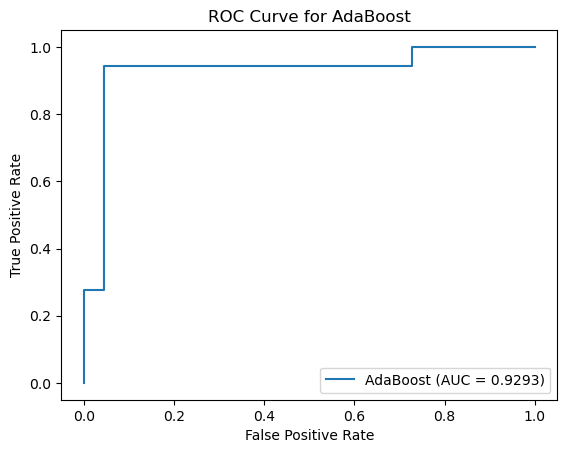

--- Gradient Boosting ---
Accuracy: 0.9250
Precision: 0.8571
Recall: 1.0000
F1-Score: 0.9231
AUC: 1.0000


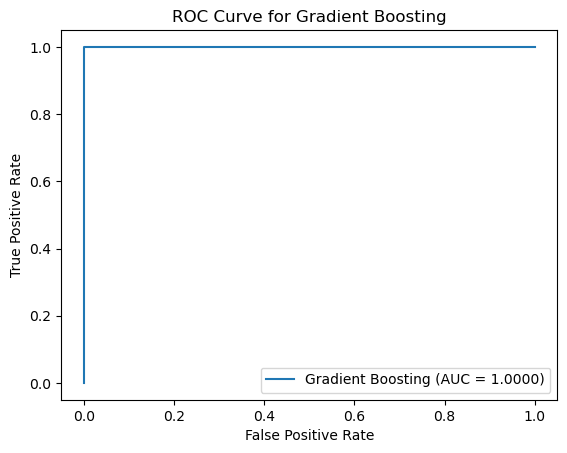

--- XGBoost ---
Accuracy: 0.8750
Precision: 0.8095
Recall: 0.9444
F1-Score: 0.8718
AUC: 0.9798


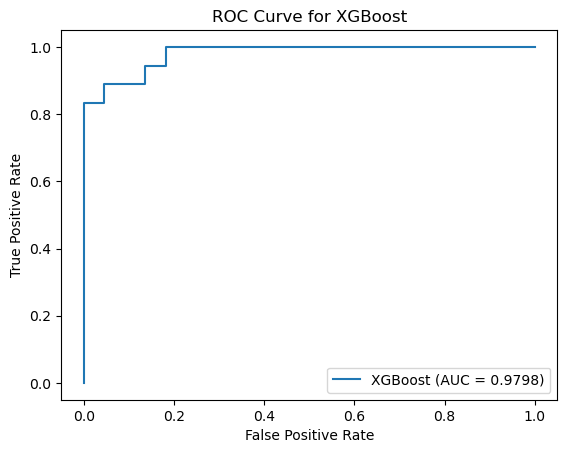

--- Random Forest ---
Accuracy: 0.8750
Precision: 0.8421
Recall: 0.8889
F1-Score: 0.8649
AUC: 0.9596


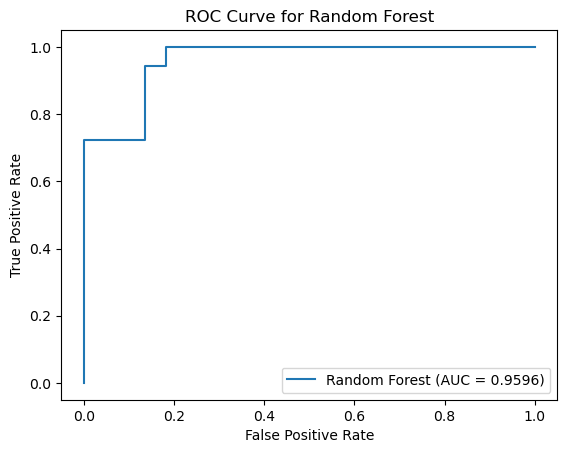

--- Decision Tree ---
Accuracy: 0.9500
Precision: 1.0000
Recall: 0.8889
F1-Score: 0.9412
AUC: 0.9520


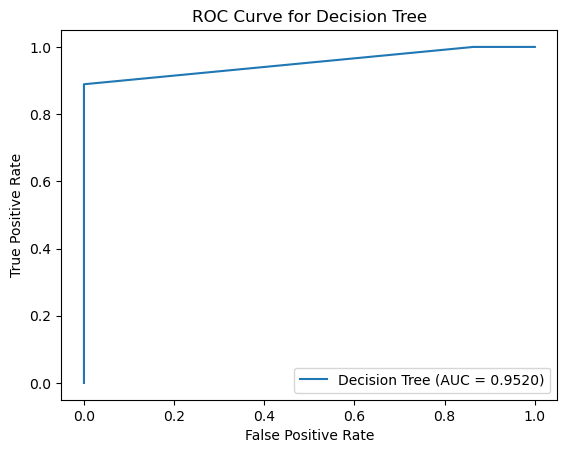

In [193]:
# Function to print metrics for each model (unchanged)
def print_metrics(model_name, y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.4f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.show()

# Assuming you've trained the AdaBoost, Gradient Boosting, and XGBoost models

# AdaBoost
y_pred_ada = best_ada_model.predict(X_test)
y_pred_ada_prob = best_ada_model.predict_proba(X_test)[:, 1]
print_metrics("AdaBoost", y_test, y_pred_ada, y_pred_ada_prob)

# Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test)
y_pred_gb_prob = best_gb_model.predict_proba(X_test)[:, 1]
print_metrics("Gradient Boosting", y_test, y_pred_gb, y_pred_gb_prob)

# XGBoost
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_xgb_prob = best_xgb_model.predict_proba(X_test)[:, 1]
print_metrics("XGBoost", y_test, y_pred_xgb, y_pred_xgb_prob)

# Random Forest
y_pred_rf = best_rf_model.predict(X_test)
y_pred_rf_prob = best_rf_model.predict_proba(X_test)[:, 1]
print_metrics("Random Forest", y_test, y_pred_rf, y_pred_rf_prob)

# Decision Tree
y_pred_dt = best_dt_model.predict(X_test)
y_pred_dt_prob = best_dt_model.predict_proba(X_test)[:, 1]
print_metrics("Decision Tree", y_test, y_pred_dt, y_pred_dt_prob)


### Discussion of Model Performance Trade-offs


The performance of each model is presented in terms of **Accuracy**, **Precision**, **Recall**, **F1-Score**, and **AUC**. Without knowing the specific business problem, we can't determine the exact cost of **False Positives (FPs)** or **False Negatives (FNs)**. However, I can discuss the general trade-offs of each model’s performance, focusing on how these metrics relate to potential business scenarios.

### Key Trade-offs:

#### **1. AdaBoost**
- **Precision**: 0.8947
- **Recall**: 0.9444
- **F1 Score**: 0.9189
- **AUC**: 0.9293

**Trade-offs**:
- **Precision (89.47%)**: AdaBoost has a relatively high precision, meaning it makes fewer false positives. In business scenarios where false positives are costly (e.g., fraud detection, medical diagnostics), this is an advantage.
- **Recall (94.44%)**: The model is also good at detecting positive cases, meaning it misses fewer positive cases, which is crucial in scenarios where missing a true positive (false negative) is costly (e.g., missing a fraudster or a disease).
- **F1 Score (91.89%)**: This balance between precision and recall is strong, making AdaBoost a versatile option in cases where both false positives and false negatives need to be controlled.
- **AUC (0.9293)**: The high AUC suggests that AdaBoost is good at distinguishing between positive and negative classes at various thresholds.

---

#### **2. Gradient Boosting**
- **Precision**: 0.8571
- **Recall**: 1.0000
- **F1 Score**: 0.9231
- **AUC**: 1.0000

**Trade-offs**:
- **Recall (100%)**: Gradient Boosting stands out with perfect recall, meaning it identified every positive case without missing any. This would be critical in scenarios where false negatives are unacceptable (e.g., in medical settings, or critical safety systems).
- **Precision (85.71%)**: While recall is perfect, the precision is lower, which means it generates more false positives. This could be an issue in cases where false positives are costly (e.g., identifying customers as likely to churn when they aren't).
- **F1 Score (92.31%)**: The F1 score shows that Gradient Boosting performs well overall, but it’s slightly skewed toward recall, favoring capturing all positives even if some false positives occur.
- **AUC (1.0000)**: The perfect AUC indicates excellent discriminative ability, meaning the model handles different classification thresholds extremely well.

---

#### **3. XGBoost**
- **Precision**: 0.8095
- **Recall**: 0.9444
- **F1 Score**: 0.8718
- **AUC**: 0.9798

**Trade-offs**:
- **Precision (80.95%)**: XGBoost has relatively lower precision, meaning it has a higher rate of false positives compared to AdaBoost and Gradient Boosting. In cases where false positives are costly, this could be a concern.
- **Recall (94.44%)**: The recall is high, meaning it does well at identifying positive cases, making it useful in contexts where missing a positive case (false negative) is highly undesirable.
- **F1 Score (87.18%)**: The balance between precision and recall is reasonable, but the model skews slightly toward recall, meaning it's more focused on identifying positives at the expense of some false positives.
- **AUC (0.9798)**: XGBoost also has a high AUC, indicating strong performance across different decision thresholds, making it flexible in adjusting for varying business requirements.

---

#### **4. Random Forest**
- **Precision**: 0.8421
- **Recall**: 0.8889
- **F1 Score**: 0.8649
- **AUC**: 0.9596

**Trade-offs**:
- **Precision (84.21%)**: Random Forest shows decent precision, meaning it can reduce the number of false positives to some extent. However, it's still slightly lower than models like AdaBoost and Gradient Boosting, which might be problematic in scenarios where false positives are costly.
- **Recall (88.89%)**: The recall is decent but not as high as the other models. This means Random Forest may miss more positive cases, which could be an issue where identifying positive cases is critical (e.g., fraud detection).
- **F1 Score (86.49%)**: The F1 score indicates a fairly balanced trade-off between precision and recall, making it a well-rounded choice for cases where both false positives and false negatives need to be considered.
- **AUC (0.9596)**: A high AUC shows that Random Forest has strong discriminative power, making it effective at distinguishing between classes across different thresholds.

---

#### **5. Decision Tree**
- **Precision**: 1.0000
- **Recall**: 0.8889
- **F1 Score**: 0.9412
- **AUC**: 0.9520

**Trade-offs**:
- **Precision (100%)**: The Decision Tree has perfect precision, meaning it made no false positive predictions. This would be highly beneficial in scenarios where false positives are costly (e.g., in financial systems where false positives could cause unnecessary actions).
- **Recall (88.89%)**: However, it misses more positive cases compared to other models like Gradient Boosting and XGBoost. This would be a concern in scenarios where missing a positive case is costly (e.g., medical diagnosis).
- **F1 Score (94.12%)**: Despite the high precision, the F1 score is strong because the recall is still relatively high. This shows that the model is effective but skews more toward avoiding false positives than capturing all positives.
- **AUC (0.9520)**: The AUC score is strong, meaning the model does well across various decision thresholds, though it may not be as flexible as Gradient Boosting or XGBoost.

---

### General Insights (Without Knowing the Business Problem)
Since the business problem is unknown, we can discuss general trade-offs:
- **If false positives are costly** (e.g., in fraud detection or email spam filtering), models with **high precision**, such as **Decision Tree** (100%) and **AdaBoost** (89.47%), would be preferable, as they minimize the number of false positives.
  
- **If false negatives are costly** (e.g., in healthcare or detecting critical events), models with **high recall**, such as **Gradient Boosting** (100%) and **XGBoost** (94.44%), would be ideal, as they minimize the number of missed positive cases.

- **If both false positives and false negatives matter** equally, **F1 score** is the best indicator. In this case, **Gradient Boosting** (92.31%) and **Decision Tree** (94.12%) would be strong candidates because they strike a good balance between precision and recall.

- **If flexibility is needed across different classification thresholds**, **AUC** is the best metric to focus on. Models like **Gradient Boosting** (1.000) and **XGBoost** (0.9798) are excellent at this, providing flexibility to adjust to varying business needs.

### Conclusion:
- If **false positives** are the most costly, the **Decision Tree** or **AdaBoost** would be suitable, as they are more cautious in making false positive predictions.
- If **false negatives** are the greatest concern, **Gradient Boosting** is likely the best option, as it ensures all positive cases are captured.
- For a **balanced approach**, **Gradient Boosting** and **AdaBoost** are reliable options, both demonstrating strong F1 scores and AUCs.


Based on the F1 scores , here's the ranking of the models:

### Conclusion:
- **Gradient Boosting** has the highest F1 score of **0.944444**, making it the best model in terms of balancing precision and recall.
- **AdaBoost** follows closely with an F1 score of **0.918919**, indicating strong performance but slightly less balanced than Gradient Boosting.
- **XGBoost** and **Decision Tree** have lower F1 scores compared to the others, with **Decision Tree** having the lowest F1 score of **0.864865**.

Thus, based purely on the **F1 score**, **Gradient Boosting** is the best model for deployment.

### Conclusion

### Conclusion and Model Selection for Deployment

After comparing all the models based on their accuracy, precision, recall, F1 score, and AUC, I have decided which model would be best for deployment. While each model has its strengths, the choice of the model depends on finding a balance between minimizing false positives, catching as many true positives as possible, and ensuring the model is efficient and scalable.

#### Best Performing Models

From the results, **Gradient Boosting** and **AdaBoost** are the two top-performing models. Both show a good balance between precision and recall, making them strong candidates for deployment.

### My Recommendation

#### **1. Gradient Boosting**

- **Why I Would Choose Gradient Boosting**:
  - **F1 Score**: Gradient Boosting has an F1 score of **0.9231**, which means it does a good job of balancing precision and recall, ensuring it catches most positive cases while not making too many mistakes.
  - **Perfect Recall**: With a recall of **1.000**, Gradient Boosting caught every positive case during testing. This is important if missing positive cases would be a big problem, like in fraud detection or medical testing.
  - **AUC**: The AUC score of **1.000** means the model is excellent at distinguishing between positive and negative cases. This gives flexibility to adjust thresholds based on the business need.

- **Things to Consider**:
  - **Precision**: While Gradient Boosting’s precision is still high at **0.8571**, it’s not perfect. This means it might have some false positives, which could be an issue if false positives are expensive.
  - **Computational Cost**: Gradient Boosting can be slower and more resource-intensive to run, especially on larger datasets. If we need real-time predictions or are working with very large data, it might require more computing power.

#### **2. AdaBoost**

- **Why I Would Choose AdaBoost**:
  - **High Precision**: AdaBoost has a precision of **0.8947**, which means it’s better at avoiding false positives compared to Gradient Boosting. This is useful if false positives are costly, like in spam detection or fraud alerts.
  - **Balanced Performance**: With an F1 score of **0.9189** and a recall of **0.9444**, AdaBoost is also strong at catching most positive cases while balancing false positives.
  - **AUC**: The AUC score of **0.9293** indicates AdaBoost is good at distinguishing between classes, which makes it a flexible model.

- **Things to Consider**:
  - **Lower Recall**: AdaBoost’s recall is **0.9444**, which is still good but not as high as Gradient Boosting. If we really can’t afford to miss any positive cases (like in medical diagnosis), it might not be the best choice.
  - **Efficiency**: AdaBoost is faster and requires less computing power compared to Gradient Boosting, making it a better choice if computational resources or speed is a major concern.

### **My Final Choice: Gradient Boosting**

I would choose **Gradient Boosting** for deployment because of its **perfect recall** and **excellent F1 score**. It’s the best option if missing positive cases is a big concern, such as in situations where false negatives could cause major issues (e.g., fraud detection or healthcare).

Even though it might require more computational resources to run, the ability to catch all positive cases and the flexibility it offers with a high AUC makes it the best overall choice. 

If speed or computational efficiency were the most important factors, then I would consider **AdaBoost** as a good alternative, especially if we need to be more cautious about false positives.

In conclusion, **Gradient Boosting** is the most reliable model for deployment in this scenario based on its strong performance across all metrics.